# Homework 4 (DUE: 11:59pm HKT, March 31st)
---
*See [Detailed Instructions] for Homework Submission*

So far, we've looked at a ton of neat things that we can do with images: filtering, edge detection, stitching, segmentation, and classification.   

In this assignment, we'll explore some of the 3D geometry that underlies how these images are formed. The homework has three parts, including camera projection matrix, vanishing point, and camera calibration.

In [1]:
### Setup ##

from google.colab import drive
drive.mount('/content/drive')


FOLDERNAME = 'School/TA/CSCI3330/hw4/hw4'
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

%cd /content/drive/My\ Drive/$FOLDERNAME

import numpy as np
import matplotlib.pyplot as plt


def hash_numpy(x):
    import hashlib
    return hashlib.sha1(x.view(np.uint8)).hexdigest()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/School/TA/CSCI3330/hw4/hw4


---
## Part 1. Transformations in 3D (40 Points)

In order to make sense of how objects in our world are rendered in a camera, we typically need to understand how they are located relative to the camera. In this question, we'll examine some properties of the transformations that formalize this process by expressing coordinates with respect to multiple frames.

We'll be considering a scene with two frames: a world frame ($W$) and a camera frame ($C$).

Notice that:
- We have 3D points $p$, $q$, $r$, and $s$ that define a square, which is parallel to the world $zy$ plane
- $C_z$ and $C_x$ belong to the plane defined by $W_z$ and $W_x$
- $C_y$ is parallel to $W_y$

<!-- into camera space as we translate a simple shape from world coordinates to camera coordinates. We will take this square in world coordinates and transform it into the camera coordinates.-->

(-0.5, 1103.5, 1011.5, -0.5)

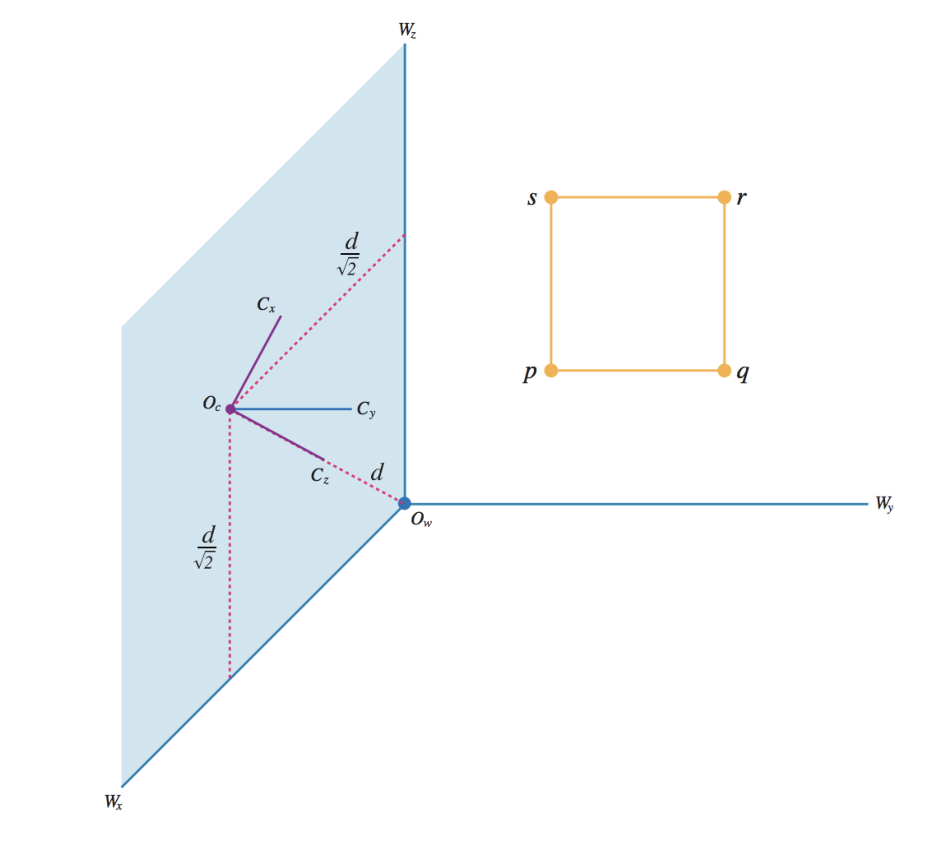

In [2]:
fig = plt.figure(figsize=(19.2, 10.8))
plt.imshow(plt.imread('images/projection_geometry.png'))
plt.axis('off')

### 1.1 Reference Frame Definitions (10 points)

First, we'll take a moment to validate your understanding of 3D reference frames.

Consider creating:
- A point $w$ at the origin of the world frame ($O_w$)
- A point $c$ at the origin of the camera frame ($O_c$)

Examine the $x$, $y$, and $z$ axes of each frame, then express these points with respect to the world and camera frames. Fill in **`w_wrt_camera`**, **`w_wrt_world`**, and **`c_wrt_camera`**.

You can consider the length $d = \sqrt{2}$.

In [3]:
d = np.sqrt(2)

# Abbreviation note:
# - "wrt" stands for "with respect to", which is ~synonymous with "relative to"

w_wrt_world = np.array([0.0, 0.0, 0.0])  # Done for you

### YOUR CODE HERE
w_wrt_camera = np.array([0, 0, np.sqrt(2)])  # c
c_wrt_world = np.array([1, 0, 1])          # w
c_wrt_camera = np.array([0, 0, 0])         # c
### END YOUR CODE

In [4]:
# Run this cell to check your answers!

assert (
    (3,)
    == w_wrt_camera.shape
    == c_wrt_world.shape
    == c_wrt_camera.shape
), "Wrong shape!"
assert (
    hash_numpy(w_wrt_camera) == "19c715fa21136b81e316d1f8f48f58b4a1cc8ee1"
), "Double check your w_wrt_camera!"
assert (
    hash_numpy(c_wrt_camera) == "d3399b7262fb56cb9ed053d68db9291c410839c4"
), "Double check your c_wrt_camera!"

##
assert (
    hash_numpy(c_wrt_world) == "61a145a7cda0a03a6aaab25d4f4163fc264a5fc9"
), "Double check your c_wrt_world!"

print("Looks correct!")

Looks correct!


### 1.2 World ⇨ Camera Transforms (10 points)

Derive the homogeneous transformation matrix needed to convert a point expressed with respect to the world frame $W$ in the camera frame $C$.

**Discuss the rotation and translation terms in this matrix and how you determined them, then implement it in `camera_from_world_transform()`**.

We've also supplied a set of `assert` statements below to help you check your work.

---

*Hint #1:*
With rotation matrix $R \in \mathbb{R}^{3\times 3}$ and translation vector $t \in \mathbb{R}^{3\times 1}$, you can write transformations as $4 \times 4$ matrices:
$$
\begin{bmatrix}{x_C} \\ {y_C} \\ {z_C} \\ 1\end{bmatrix} =
\begin{bmatrix}
    R & t \\
    \vec{0}^\top & 1
\end{bmatrix}
\begin{bmatrix}{x_W} \\ {y_W} \\ {z_W} \\ 1\end{bmatrix}
$$

*Hint #2: Remember our 2D transformation matrix for rotations in the $xy$ plane.*

$$\begin{bmatrix}{x}' \\ {y}'\end{bmatrix} = \begin{bmatrix} \cos(\theta) & -\sin(\theta) \\ \sin(\theta) & \cos(\theta)\end{bmatrix} \begin{bmatrix}{x} \\ {y}\end{bmatrix}$$

To apply this to 3D rotations, you might think of this $xy$ plane rotation as holding the $z$ coordinate constant, since that's the axis you're rotating around, and transforming the $x$ and $y$ coordinates as described in the 2D formulation:

$$\begin{bmatrix}{x}' \\ {y}' \\ {z}'\end{bmatrix}  = \begin{bmatrix} \cos(\theta) & -\sin(\theta) & 0 \\ \sin(\theta) & \cos(\theta) & 0 \\ 0 & 0 & 1\end{bmatrix} \begin{bmatrix}{x} \\ {y} \\ {z}\end{bmatrix}$$

(the [Wikipedia](https://en.wikipedia.org/wiki/Rotation_matrix) page may also be helpful)

*Hint #3: In a homogeneous transform, the translation is applied after the rotation.*

As a result, you can visualize the translation as an offset in the output frame.

The order matters! You'll end up with a different transformation if you translate and then rotate versus if you rotate first and then translate with the same offsets. In lecture 2 we discussed a formulation for a combinated scaling, rotating, and translating matrix (in that order), which can be a useful starting point.

---

**Your Answer Here:** Write your answer in this markdown cell.

When implementing the rotation, since we are rotating the coordinate around the y axis for $\theta = \frac{3}{4}\pi$, so for x, z coordinate, the 2D transformation matrix is
$$\begin{bmatrix}{x}' \\ {z}'\end{bmatrix} = \begin{bmatrix} \cos(\theta) & -\sin(\theta) \\ \sin(\theta) & \cos(\theta)\end{bmatrix} \begin{bmatrix}{x} \\ {z}\end{bmatrix}=\begin{bmatrix} -\frac{\sqrt2}{2} & \frac{\sqrt2}{2} \\ -\frac{\sqrt2}{2} & -\frac{\sqrt2}{2}\end{bmatrix} \begin{bmatrix}{x} \\ {z}\end{bmatrix}$$

Taking the y axis into account, the transformation is

$$\begin{bmatrix}{x}' \\ {y}' \\ {z}'\end{bmatrix}  =\begin{bmatrix} \cos(\theta) & 0 & -\sin(\theta) \\ 0 & 1 & 0 \\ \sin(\theta) &0 & \cos(\theta)  \end{bmatrix} \begin{bmatrix}{x} \\ {y} \\ {z}\end{bmatrix}=\begin{bmatrix} -\frac{\sqrt2}{2} & 0  & \frac{\sqrt2}{2} \\ 0 & 1 & 0 \\ -\frac{\sqrt2}{2} & 0 & -\frac{\sqrt2}{2}\end{bmatrix} \begin{bmatrix}{x} \\ y\\ {z}\end{bmatrix}$$

So $$R = \begin{bmatrix} -\frac{\sqrt2}{2} & 0  & \frac{\sqrt2}{2} \\ 0 & 1 & 0 \\ -\frac{\sqrt2}{2} & 0 & -\frac{\sqrt2}{2}\end{bmatrix}$$

Secondly, we should perform the translation based on the already rotated world coordinate. Since the coordinate is rotated around the y axis for $\frac{3}{4}\pi$, the shifting is to shift the coordinate for length $d=\sqrt2$ along the negative direction of the already rotated $W_z$ axis, which is $W_z'$, and not shifting on the other axes $W_x'$ and $W_y'$

So the translation matrix $$ t=\begin{bmatrix}
  0\\
  0\\
  \sqrt[]{2}
\end{bmatrix}$$

So $$ T = \begin{bmatrix}
    R & t \\
    \vec{0}^\top & 1
\end{bmatrix} = \begin{bmatrix}
  &-\frac{\sqrt2}{2}   &0  &\frac{\sqrt2}{2} &0 \\
  &0  &1  &0 &0 \\
  &-\frac{\sqrt2}{2}  &0  &-\frac{\sqrt2}{2} &\sqrt[]{2} \\
  &0  &0  &0 &1
\end{bmatrix}$$

In [5]:
# Check your answer against 1.1!
from cameras import camera_from_world_transform

T_camera_from_world = camera_from_world_transform()

# Check c_wrt_camera against T_camera_from_world @ w_wrt_world
w_wrt_camera_computed = (T_camera_from_world @ np.append(w_wrt_world, 1.0))[:3]
print(f"w_wrt camera: expected {w_wrt_camera}, computed {w_wrt_camera_computed}")
assert np.allclose(
    w_wrt_camera, w_wrt_camera_computed
), "Error! (likely bad translation)"
print("Translation components look reasonable!")

# Check w_wrt_camera against T_camera_from_world @ c_wrt_world
c_wrt_camera_computed = (T_camera_from_world @ np.append(c_wrt_world, 1.0))[:3]
print(f"c_wrt camera: expected {c_wrt_camera}, computed {c_wrt_camera_computed}")
assert np.allclose(
    c_wrt_camera, c_wrt_camera_computed
), "Error! (likely bad rotation)"
print("Rotation components looks reasonable!")

w_wrt camera: expected [0.         0.         1.41421356], computed [0.         0.         1.41421356]
Translation components look reasonable!
c_wrt camera: expected [0 0 0], computed [0.00000000e+00 0.00000000e+00 2.22044605e-16]
Rotation components looks reasonable!


### 1.3 Preserving Edge Orientations (Geometric Intuition) (10 points)

Under the translation and rotation transformation from world coordinates to camera coordinates, which, if any, of the edges of the square retain their orientation and why?

For those that change orientation, how do they change? (e.g. translation x,y,z and rotation in one of our planes).

A sentence or two of geometric intuition is sufficient for each question, such as reasoning about the orientation of the edges and which axes we're rotating and translating about.

---

**Your Answer Here:** Write your answer in this markdown cell.

First in the rotation process, the square is rotated around $W_y$ for 135 degrees. Since $sr$ and $pq$ are parallel to $W_y$ and $sp$ and $rq$ are not parallel to $W_y$, the orientations of $sr$ and $pq$ remain the same but those of $sp$ and $rq$ change.

Then in the translation step, since there only shifting, no orientation will be changed.

So in the process, the orientations of $sr$ and $pq$ remain the same but those of $sp$ and $rq$ change.

For those that change orientation, which are $sp$ and $rq$, they are first rotated around axis $W_y$ for 135 degrees in clockwise direction when seen from the negative part of $W_y$. Then they are shifted for length $d$ in the direction from $O_w$ to $O_c$

### 1.4 Preserving Edge Orientations (Mathematical Proof) (10 Points)

We'll now connect this geometric intuition to your transformation matrix. Framing transformations as matrix multiplication is useful because it allows us to rewrite the difference between two transformed points as the transformation of the difference between the original points. For example, take points $a$ and $b$ and a transformation matrix $T$: $Ta - Tb = T(a-b)$.

All of the edges in the $p,q,r,s$ square are axis-aligned, which means each edge has a nonzero component on only one axis. Assume that the square is 1 by 1, and apply your transformation to the edge vectors $bottom=q-p$ and $left=s-p$ to show which of these edges rotate and how.

*Notation:*
You can apply the transformation to vectors representing the direction of each edge. If we transform all 4 corners, then the vector representing the direction of the transformed square's bottom is:
$$\begin{bmatrix}{bottom_x}' \\ {bottom_y}' \\ {bottom_z}' \\ 0\end{bmatrix} = T\begin{bmatrix}{q_x} \\ {q_y} \\ {q_z} \\ 1\end{bmatrix} -T\begin{bmatrix}{p_x} \\ {p_y} \\ {p_z} \\ 1\end{bmatrix}$$

Using matrix rules, we can rewrite this in terms of the edges of the original square
$$\begin{bmatrix}{bottom_x}' \\ {bottom_y}' \\ {bottom_z}' \\ 0\end{bmatrix} = T\begin{bmatrix}{q_x}-p_x \\ {q_y}-p_y \\ {q_z}-p_z \\ 0\end{bmatrix}$$

**Eliminate the $q - p$ components that you know to be 0, and then apply your transformation to obtain the vector $bottom' = q' - p'$ defined above. Do the same for $left' = s' -p'$. Which edge rotated, and which one didn't?**

---

**Your Answer Here:** Write your answer in this markdown cell.

Since the orientation of $pq$ is the same with $W_y$, so that the only axis that has difference in the coordinate of $p$ and $q$ is y axis, which means that only ${q_y}-p_y = 1$, and $q_x-p_x=q_z-p_z=0$, i.e.$$bottom=\begin{bmatrix}{0} \\ 1 \\ 0 \\0\end{bmatrix}$$

So the transformation becomes
$$bottom'=\begin{bmatrix}{bottom_x}' \\ {bottom_y}' \\ {bottom_z}' \\ 0\end{bmatrix} = T\begin{bmatrix}{q_x} \\ {q_y} \\ {q_z} \\ 1\end{bmatrix} -T\begin{bmatrix}{p_x} \\ {p_y} \\ {p_z} \\ 1\end{bmatrix}=T\begin{bmatrix}{q_x}-p_x \\ {q_y}-p_y \\ {q_z}-p_z \\ 0\end{bmatrix} = T\begin{bmatrix}{0} \\ 1 \\ 0 \\0\end{bmatrix}$$


As for $sp$, since the orientation of $sp$ is the same with $W_z$, so that the only axis that has difference in the coordinate of $s$ and $p$ is z axis, which means that only ${s_z}-p_z = 1$, and $s_x-p_x=s_y-p_y=0$, i.e. $$left=\begin{bmatrix}{0} \\ 0 \\ 1 \\0\end{bmatrix}$$

So the transformation becomes
$$left'=\begin{bmatrix}{left_x}' \\ {left_y}' \\ {left_z}' \\ 0\end{bmatrix} = T\begin{bmatrix}{s_x} \\ {s_y} \\ {s_z} \\ 1\end{bmatrix} -T\begin{bmatrix}{p_x} \\ {p_y} \\ {p_z} \\ 1\end{bmatrix}=T\begin{bmatrix}{s_x}-p_x \\ {s_y}-p_y \\ {s_z}-p_z \\ 0\end{bmatrix} = T\begin{bmatrix}{0} \\ 0 \\ 1 \\0\end{bmatrix}$$

And since in this case,
$$T = \begin{bmatrix}
  &-\frac{\sqrt2}{2}   &0  &\frac{\sqrt2}{2} &0 \\
  &0  &1  &0 &0 \\
  &-\frac{\sqrt2}{2}  &0  &-\frac{\sqrt2}{2} &\sqrt[]{2} \\
  &0  &0  &0 &1
\end{bmatrix}$$

$$bottom' = T\begin{bmatrix}{0} \\ 1 \\ 0 \\0\end{bmatrix} = \begin{bmatrix}{0} \\ 1 \\ 0 \\0\end{bmatrix}$$
$$left'= T\begin{bmatrix}{0} \\ 0 \\ 1 \\0\end{bmatrix}=\begin{bmatrix}{\frac{\sqrt2}{2}} \\ 0 \\ -\frac{\sqrt2}{2} \\0\end{bmatrix}$$

So we can clearly see that $pq$ hasn't been rotated because $bottom$ and $bottom'$ has the same direction.

$sq$ has been rotated because $left$ and $left'$ has different direction (cross product of $left$ and $left'$ doesn't equal to 0)

*Interesting note:* This may remind you of eigenvectors: one of these edges (the one that doesn't rotate) is an eigenvector of our transformation matrix!

### 1.5 Visualization

Implement **`apply_transform()`** in **`cameras.py`** to help us apply a homogeneous transformation to a batch of points.

Then, run the cell below to start visualizing our frames and the world square in PyPlot!

Using your code, we can animate a GIF that shows the transition of the square from its position in world coordinates to a new position in camera coordinates. We transform the perspective continuously from the world coordinate system to the camera coordinate system. Analogous to a homogeneous transform, you can see that we first rotate to match the orientation of the camera coordinate system, then translate to match the position of the camera origin.

If you want to see how the animation was computed or if you want to play around with its configuration, then check out **`animate_transformation`** in **`utils.py`**!

In [6]:
from cameras import apply_transform
from utils import (
    animate_transformation,
    configure_ax,
    plot_frame,
    plot_square,
)

# Vertices per side of the square
N = 2

# Compute vertices corresponding to each side of the square
vertices_wrt_world = np.concatenate(
    [
        np.vstack([np.zeros(N), np.linspace(1, 2, N), np.ones(N)]),
        np.vstack([np.zeros(N), np.ones(N) + 1, np.linspace(1, 2, N)]),
        np.vstack([np.zeros(N), np.linspace(2, 1, N), np.ones(N) + 1]),
        np.vstack([np.zeros(N), np.ones(N), np.linspace(1, 2, N)]),
    ],
    axis=1,
)

# Visualize our rotation!
animate_transformation(
    "transformation.gif",
    vertices_wrt_world,
    camera_from_world_transform,
    apply_transform,
)

import IPython.display

with open("transformation.gif", "rb") as file:
    display(IPython.display.Image(file.read()))

# Uncomment to compare to staff animation
with open("images/solution_transformation.gif", "rb") as file:
    display(IPython.display.Image(file.read()))

Output hidden; open in https://colab.research.google.com to view.

---
## Part 2. Camera Intrinsics & Vanishing Points (35 Points)

In a pinhole camera, lines that are parallel in 3D rarely remain parallel when projected to the image plane. Instead, parallel lines will meet at a **vanishing point**:

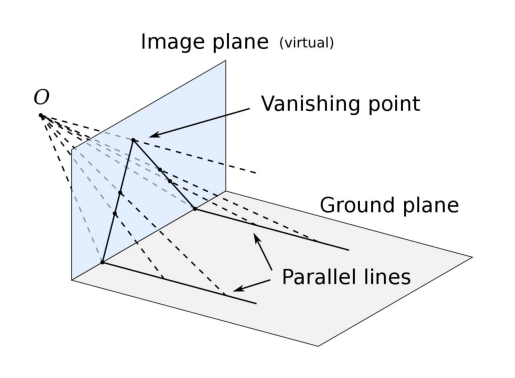

In [7]:
_=plt.imshow(plt.imread('images/vanishing_point.jpg'))
_=plt.axis('off')

### 2.1 Homogeneous coordinates (10 points)

Consider a line that is parallel to a world-space direction vector in the set $\{ d \in \mathbb{R}^3 : d^\top d = 1\}$. Show that the image coordinates $v$ of the vanishing point can be be written as $v = KRd$.

*Hints:*
- As per the lecture slides, $K$ is the camera calibration matrix and $R$ is the camera extrinsic rotation.
- As in the diagram above, the further a point on a 3D line is from the camera origin, the closer its projection will be to the line's 2D vanishing point.
- Given a line with direction vector $d$, you can write a point that's infinitely far away from the camera via a limit: $\lim_{\alpha \to \infty} \alpha d$.
- The 3D homogeneous coordinate definition is:
$$
\begin{bmatrix}
    x & y & z & w
\end{bmatrix}^\top
\iff
\begin{bmatrix}
    x/w & y/w & z/w & 1
\end{bmatrix}^\top
$$

**You Answer Here:** Write your answer in this markdown cell.

As discussed in part $1.2$, assume the extrinsic matrix is $$ T = \begin{bmatrix}
    R & t \\
    \vec{0}^\top & 1
\end{bmatrix}$$

Assume the rotation matrix is $$R = \begin{bmatrix}
r_1 \\
r_2\\
r_3
\end{bmatrix}$$
where $r1$, $r2$, $r3$ are 1x3 vector representing the first second and third row of rotation matrix

Assume $$ t = \begin{bmatrix}
t_1 \\
t_2\\
t_3
\end{bmatrix}$$

Assume the direction vector of line $l$ $$d=\begin{bmatrix}
d_1 \\
d_2 \\
d_3
\end{bmatrix}$$


So the world coordinate of point P that's infinitely far away from the camera and is on $l$ is  $$p_w = \lim_{\alpha \to \infty} \alpha d = \lim_{\alpha \to \infty} \begin{bmatrix}
\alpha d_1 \\
\alpha d_2 \\
\alpha d_3
\end{bmatrix} $$

write $p_w$ to homogenous equation gives $$ p_w = \lim_{\alpha \to \infty} \begin{bmatrix}
\alpha d_1 \\
\alpha d_2 \\
\alpha d_3
\end{bmatrix} \equiv \lim_{\alpha \to \infty}  \begin{bmatrix}
\alpha d_1 \\
\alpha d_2 \\
\alpha d_3 \\
1
\end{bmatrix} = \tilde{p}_w$$

Then $P$ in camera homogenous coordinate $$\tilde{p}_c = T \tilde{p}_w = \lim_{\alpha \to \infty} \begin{bmatrix}
    R & t \\
    \vec{0}^\top & 1
\end{bmatrix} \begin{bmatrix}
\alpha d_1 \\
\alpha d_2 \\
\alpha d_3 \\
1
\end{bmatrix} = \lim_{\alpha \to \infty} \begin{bmatrix}
    R \\
    \vec{0}^\top  
\end{bmatrix} \begin{bmatrix}
\alpha d_1 \\
\alpha d_2 \\
\alpha d_3
\end{bmatrix} + \begin{bmatrix}
    t \\
    1 \end{bmatrix} = \lim_{\alpha \to \infty}  \begin{bmatrix}
\alpha r_1 d_1 + t_1\\
\alpha  r_2 d_2 + t_2\\
\alpha  r_3 d_3 + t_3 \\
1
\end{bmatrix}  = \lim_{\alpha \to \infty}  \begin{bmatrix}
\alpha R d + t\\
1
\end{bmatrix} $$

Then transform to image coordinate:

$$\tilde{v} = [K | 0] \tilde{p}_c = \lim_{\alpha \to \infty} [K | 0] \begin{bmatrix}
\alpha R d + t\\
1
\end{bmatrix} = \lim_{\alpha \to \infty}  \alpha K R d + K t $$

Since $\alpha \to \infty$, we can ignore the $Kt$ term, so $$ \tilde{v} = \lim_{\alpha \to \infty}    \alpha K R d$$

Since in homogenous coordinate, for any coordinate $c$ any non zero constant $\alpha$, $$ c \equiv \alpha c $$

so

$$\tilde{v}= \lim_{\alpha \to \infty}    \alpha K R d = KRd $$

(here I use $\tilde{c}$ to represent the homogenous coordinate of any point $c$)

### 2.2 Calibration from vanishing points (10 points)

Let $d_0, d_1, \dots$ represent directional vectors for 3D lines in a scene, and $v_0, v_1, \dots$ represent their corresponding vanishing points.

Consider the situtation when these lines are orthogonal:
$$
d_i^\top d_j = 0, \text{for each } i \neq j
$$

Show that:
$$
(K^{-1}v_i)^\top(K^{-1}v_j) = 0, \text{for each } i \neq j
$$

**You Answer Here:** Write your answer in this markdown cell.

From $1.1$ we know, $$ v_i = KRd_i \\ v_j = KRd_j$$

So

$$K^{-1}v_i = K^{-1}KRd_i = Rd_i \\ K^{-1}v_j = K^{-1}KRd_j= Rd_j$$

So
$$(K^{-1}v_i)^\top(K^{-1}v_j) = (Rd_i)^\top(Rd_j) = d_i^\top R^\top Rd_j$$

Since R is orthonormal matrix

$$ R^{-1} = R^\top$$

So

$$ R^\top R = R^{-1} R = I$$

Since $$d_i^\top d_j = 0$$

So

$$ d_i^\top R^\top Rd_j = (d_i)^\top I d_j = (d_i)^\top d_j = 0$$

So

$$
(K^{-1}v_i)^\top(K^{-1}v_j) = 0, \text{for each } i \neq j
$$


### 2.3 Short Response (15 points)

Respond to the following using bullet points:

- In the section above, we eliminated the extrinsic rotation matrix $R$. Why might this simplify camera calibration?

- Assuming square pixels and no skew, how many vanishing points with mutually orthogonal directions do we now need to solve for our camera's focal length and optical center?

- Assuming square pixels and no skew, how many vanishing points with mutually orthogonal directions do we now need to solve for our camera's focal length when the optical center is known?

---

**You Answer Here:** Write your answer in this markdown cell.

- Question 1:

Since $R$ is eliminated, we can establish an equation between $K$ and vanishing points $v_i$ and $v_j$ without using R. This means when we are trying to solve $K$, the parameters in $R$ are not considered as variables and the only variables in the equation are the variables in $K$. This means that we don't need to measure the transformation and rotation matrix in each position or in other words, we need less mutually orthogonal vanishing points to establish a set of equations to solve the parameters in $K$, thus finishing camera calibration.

- Question 2:

$$ K = \begin{bmatrix}
 f_x & s & o_x & 0\\
 0 & f_y & o_y & 0\\
 0 & 0 & 1 & 0
\end{bmatrix}$$

Since square pixels and no skew, $s=0$ and denote $f_x = f_y = f_{xy}$. So
$$K = \begin{bmatrix}
 f_{xy} & 0 & o_x & 0\\
 0 & f_{xy} & o_y & 0\\
 0 & 0 & 1 & 0
\end{bmatrix}$$

So to calibrate camera, there are in total 3 variables, which are focal length $f_{xy}$ and optical center $o_x$  and $o_y$.

So we need to establish 3 equations in total, which are 3 pairs of vanishing points with orthogonal directions. Since 3 vanishing points with mutually orthogonal directions can generate $C_3^2 = 3$ pairs of vanishing points with mutually orthogonal directions, we need 3 vanishing points with mutually orthogonal directions.

- Question 3:

the optical center is known, we know $o_x$  and $o_y$, so there is only 1 variable $f_{xy}$ left. So we need to establish 1 equation in total. Which means we only need 1 pair of vanishing points with mutually orthogonal directions, which are 2  vanishing points with mutually orthogonal directions.

---
## Part 3. Intrinsic Calibration (25 Points+20 Extra Points)

Using the vanishing point math from above, we can solve for a camera matrix $K$!

First, let's load in an image. To make life easier for you, we've hand labeled a set of coordinates on it that we'll use to compute vanishing points.

Image is 1300 x 975


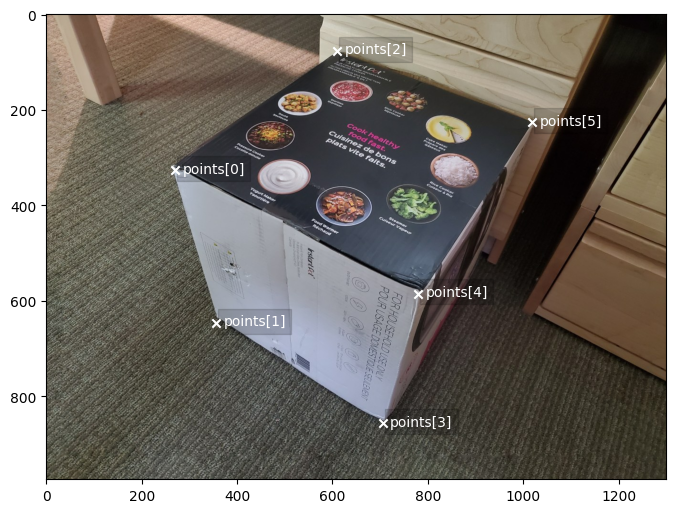

In [8]:
# Load image and annotated points; note that:
# > Our image is a PIL image type; you can convert this to NumPy with `np.asarray(img)`
# > Points are in (x, y) format, which corresponds to (col, row)!
from PIL import Image
img = Image.open("images/pressure_cooker.jpg")
print(f"Image is {img.width} x {img.height}")
points = np.array(
    [
        [270.0, 327.0],  # [0]
        [356.0, 647.0],  # [1]
        [610.0, 76.0],  # [2]
        [706.0, 857.0],  # [3]
        [780.0, 585.0],  # [4]
        [1019.0, 226.0],  # [5]
    ]
)

# Visualize image & annotated points
fig, ax = plt.subplots(figsize=(8, 10))
ax.imshow(img)
ax.scatter(points[:, 0], points[:, 1], color="white", marker="x")
for i in range(len(points)):
    ax.annotate(
        f"points[{i}]",
        points[i] + np.array([15.0, 5.0]),
        color="white",
        backgroundcolor=(0, 0, 0, 0.15),
        zorder=0.1,
    )

### 3.1 Finding Vanishing Points (25 Points)
In 2D, notice that a vanishing point can be computing by finding the intersection of two lines that we know are parallel in 3D.

To find the vanishing points in the image, implement **`intersection_from_lines()`**.

Then, run the cell below to check that it's working.

In [9]:
from cameras import intersection_from_lines

# Python trivia: the following two assert statements are the same.
# > https://docs.python.org/3/tutorial/controlflow.html#unpacking-argument-lists
# > https://numpy.org/doc/stable/reference/arrays.indexing.html#integer-array-indexing

###
# print(intersection_from_lines(points[0], points[1], points[4], points[0],))
# print(points[0])

assert np.allclose(
    intersection_from_lines(points[0], points[1], points[4], points[0],),
    points[0],
)
assert np.allclose(intersection_from_lines(*points[[0, 1, 4, 0]]), points[0])
print("Looks correct!")

Looks correct!


To use the constraint we derived above, we need to find vanishing points that correspond to three orthogonal direction vectors.

Populate `v0_indices`, `v1_indices`, and `v2_indices`, then run the cell below to compute `v`.

You should be able to get an output that looks like this (color ordering does not matter):


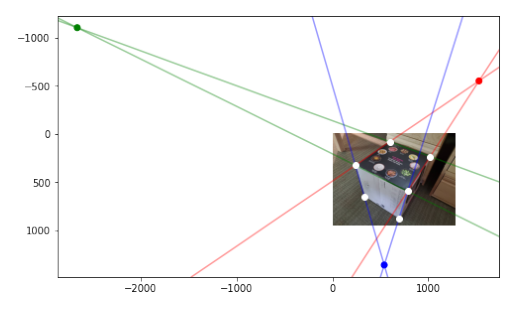

In [10]:
_=plt.imshow(plt.imread('images/vanishing_point_reference.png'))
_=plt.axis('off')

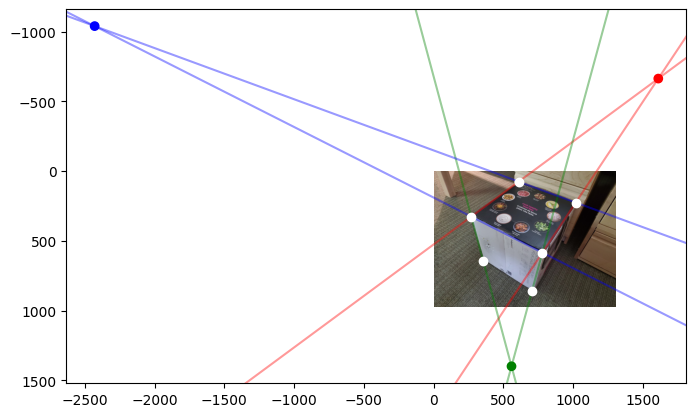

In [11]:
# Select points used to compute each vanishing point
#
# Each `v*_indices` list should contain four integers, corresponding to
# indices into the `points` array; the first two ints define one line and
# the second two define another line.

v0_indices = None
v1_indices = None
v2_indices = None


### YOUR CODE HERE
v0_indices = [0,2,4,5]# pt 0,2,4,5
v1_indices = [0,1,4,3]# pt 0,1,4,3
v2_indices = [0,4,2,5]# pt 0,4,2,5
### END YOUR CODE

# Validate indices
assert (
    len(v0_indices) == len(v1_indices) == len(v2_indices) == 4
), "Invalid length!"
for i, j, k in zip(v0_indices, v1_indices, v2_indices):
    assert type(i) == type(j) == type(k) == int, "Invalid type!"

# Compute vanishing points
v = np.zeros((3, 2))
v[:, :2] = np.array(
    [
        intersection_from_lines(*points[v0_indices]),
        intersection_from_lines(*points[v1_indices]),
        intersection_from_lines(*points[v2_indices]),
    ]
)
assert v.shape == (3, 2)

# Display image
fig, ax = plt.subplots(figsize=(8, 10))
ax.imshow(img)

# Display annotated points
ax.scatter(points[:, 0], points[:, 1], color="white")

# Visualize vanishing points
colors = ["red", "green", "blue"]
for indices, color in zip((v0_indices, v1_indices, v2_indices), colors):
    ax.axline(*points[indices[:2]], zorder=0.1, c=color, alpha=0.4)
    ax.axline(*points[indices[2:]], zorder=0.1, c=color, alpha=0.4)
ax.scatter(v[:, 0], v[:, 1], c=colors)

pass

### 3.2 Computing Optical Centers (Extra 10 Points)

Next, implement **`optical_center_from_vanishing_points()`** to compute the 2D optical center from our vanishing points. Then, run the cell below to compute a set of optical center coordinates from our vanishing points.

*Hint:* Property 3 from [1] may be useful.
> [1] Caprile, B., Torre, V. **Using vanishing points for camera calibration.** *Int J Comput Vision 4, 127–139 (1990)*. https://doi.org/10.1007/BF00127813

[639.57310997 527.25234552] 583.412727743627
Looks correct!


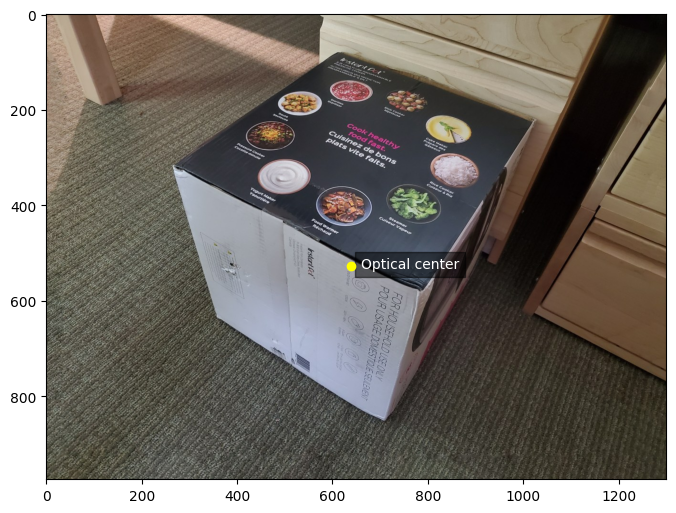

In [12]:
from cameras import optical_center_from_vanishing_points

optical_center = optical_center_from_vanishing_points(v[0], v[1], v[2],)
print(optical_center, np.mean(optical_center))
assert np.allclose(np.mean(optical_center), 583.4127277436276)
assert np.allclose(np.mean(optical_center ** 2), 343524.39942528843)
print("Looks correct!")

# Display image
fig, ax = plt.subplots(figsize=(8, 10))
ax.imshow(img)

# Display optical center
ax.scatter(*optical_center, color="yellow")
ax.annotate(
    "Optical center",
    optical_center + np.array([20, 5]),
    color="white",
    backgroundcolor=(0, 0, 0, 0.5),
    zorder=0.1,
)

pass

### 3.3 Computing Focal Lengths (Extra 10 Points)

Consider two vanishing points corresponding to orthogonal directions, and the constraint from above:

$$
(K^{-1}v_0)^\top(K^{-1}v_1) = 0, \text{for each } i \neq j
$$

Derive an expression for computing the focal length when the optical center is known, then implement **`focal_length_from_two_vanishing_points()`**.

When we assume square pixels and no skew, recall that the intrinsic matrix $K$ is:

$$
K = \begin{bmatrix}
    f & 0 & c_x \\
    0 & f & c_y \\
    0 & 0 & 1 \\
\end{bmatrix}
$$

*Hint:* Optional, but this problem maybe be simpler if you factorize $K$ as:

$$
K = \begin{bmatrix}
    1 & 0 & c_x \\
    0 & 1 & c_y \\
    0 & 0 & 1 \\
\end{bmatrix}\begin{bmatrix}
    f & 0 & 0 \\
    0 & f & 0 \\
    0 & 0 & 1 \\
\end{bmatrix}
$$

When working with homogeneous coordinates, note that the lefthand matrix is a simple translation.

$$
K^{-1} = \begin{bmatrix}
    f & 0 & 0 \\
    0 & f & 0 \\
    0 & 0 & 1 \\
\end{bmatrix}^{-1} \begin{bmatrix}
    1 & 0 & c_x \\
    0 & 1 & c_y \\
    0 & 0 & 1 \\
\end{bmatrix}^{-1} = \begin{bmatrix}
    \frac{1}{f} & 0 & 0 \\
    0 & \frac{1}{f} & 0 \\
    0 & 0 & 1 \\
\end{bmatrix} \begin{bmatrix}
    1 & 0 & -c_x \\
    0 & 1 & -c_y \\
    0 & 0 & 1 \\
\end{bmatrix} = \begin{bmatrix}
\frac{1}{f} & 0 & -\frac{c_x}{f} \\
0 & \frac{1}{f} & -\frac{c_y}{f} \\
0 & 0 & 1 \
\end{bmatrix}
$$

So that

$$ v_0^\top (K^{-1})^\top K^{-1} v_1 = v_0^\top \begin{bmatrix}
\frac{1}{f^2} & 0 & -\frac{c_x}{f^2} \\
0 & \frac{1}{f^2} & -\frac{c_y}{f^2} \\
-\frac{c_x}{f^2} & -\frac{c_y}{f^2} & \frac{c_x^2+c_y^2}{f^2} + 1 \\
\end{bmatrix}
 v_1 = 0$$

So
```python
f = np.sqrt(cx*(x1+y1) + cy*(x2+y2)  -x2*y2 -x1*y1 -(cx^2+cy^2))
```



In [13]:
from cameras import focal_length_from_two_vanishing_points

# If your implementation is correct, these should all be ~the same
f = focal_length_from_two_vanishing_points(v[0], v[1], optical_center)
print(f"Focal length from v0, v1: {f}")
f = focal_length_from_two_vanishing_points(v[1], v[2], optical_center)
print(f"Focal length from v1, v2: {f}")
f = focal_length_from_two_vanishing_points(v[0], v[2], optical_center)
print(f"Focal length from v0, v2: {f}")

Focal length from v0, v1: 1056.9925197084738
Focal length from v1, v2: 1056.992519708475
Focal length from v0, v2: 1056.9925197084763


---
**Acknowledgement**: This homework was developed based on a similar assignment from the computer vision course CS131 (Stanford) taught by Dr. Juan Carlos Niebles and  Prof. Ranjay Krishna.